In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from copy import deepcopy
params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large'}
plt.rcParams.update(params)

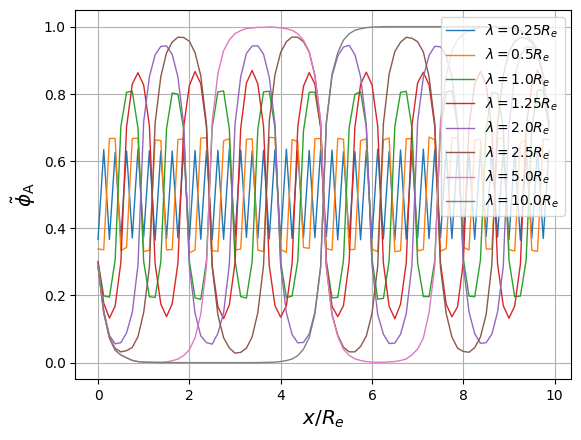

[0.9687423  0.83934307 0.55776757 0.46203863 0.29707686 0.23832096
 0.12505583 0.06890634]


In [38]:
offset=1


plt.figure(dpi=100)
plt.grid()
def plot_conversion_range(lam):
    """plot Amplitude as a function of y
    """
    dir=f"lam{lam}"
    with h5py.File(f'{dir}/coord.h5', 'r') as f:
        ##number of beads per polymer
        N=int(f['parameter/reference_Nbeads'][()]) 
        ##number of polymers
        n_polym=int(f['parameter/n_polymers'][()]) 
        ##box dimensions 
        lxyz=np.array(f['parameter/lxyz'])
        ##box discretization
        nxyz=np.array(f['parameter/nxyz'])
        #discretization
        dxyz=lxyz/nxyz
        #adjust lengths and discretizations
        lxyz[1]=lxyz[1]-2*offset*dxyz[1]
        nxyz[1]=nxyz[1]-2*offset
        #umbrella field
        umb_field=np.array(f["umbrella_field"])
        #area51
        area51=np.array(f["area51"])
        with h5py.File(f'{dir}/coord_ana.h5', 'r') as f:
            #only load every other frame, the others are not optimized
            phi=np.array(f['density_field'])
    kappa=30/N
    rho0=N*n_polym/np.prod(lxyz)
    var_phi=1/(rho0*np.prod(dxyz)*kappa)
    #only every other frame is optimized
    phi=phi[1::2]
    #average phi over time
    phi=phi.mean(axis=0)
    #number of accessible cells 
    n_cells=int(len(area51[area51==0]))
    n_cells_target=len(umb_field[umb_field>-1])
    #field scaling type
    scale=n_cells/(N*n_polym)
    #reshape density and umbrella field
    phi=phi*scale
    phi=phi[:,area51==0].reshape(phi.shape[0],nxyz[0],nxyz[1],nxyz[2])
    phi_tot=np.sum(phi,axis=0)
    #phi_tot[phi_tot==0]=1
    umb_field=umb_field[umb_field>-1].reshape(2,nxyz[0],nxyz[2])
    composition=deepcopy(phi)
    for j in range(2):
        composition[j]/=phi_tot
    #get phi and composition at y value where umbrella field is defined averaged over z
    composition_mean=composition[:,:,0,:].mean(axis=2)
    l_plot=np.arange(0,lxyz[0],dxyz[0])
    plt.plot(l_plot,composition_mean[0],lw=1,label="$\lambda=$"+f"{2*lam*dxyz[0]}"+"$R_e$")
    #plt.plot(l_plot[8:-8],composition_mean[0][8:-8],lw=1,label="measured")

    #plt.plot(l_plot,umb_field[0].mean(axis=1),lw=1,label="target")
    opt=np.loadtxt(f"{dir}/opt.csv")[::2]
    return opt.mean()/(n_cells_target*var_phi)


opts=np.empty(0)
#lams=np.array([2,8,20,40])
lams=np.array([1,2,4,5,8,10,20,40])
#lams=np.array([5])
for lam in lams:
    opts=np.append(opts,plot_conversion_range(lam))
plt.xlabel("$x/R_e$")
plt.ylabel(r"$\tilde\phi_\mathrm{A}$")
plt.legend(loc='upper right')
#plt.savefig("amplitude_lamella_per.pdf")
plt.show()
print(opts)






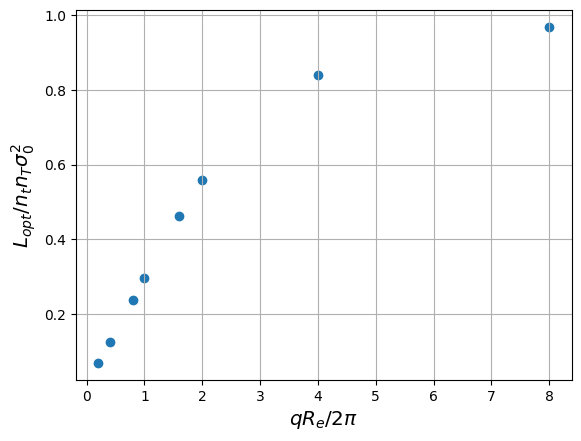

In [40]:

plt.figure(dpi=100)
plt.grid()
plt.xlabel("$qR_e/2\pi$")
plt.ylabel("$L_{opt}/n_tn_T\sigma_0^2$")
plt.scatter(1/(lams*0.125),opts)
plt.savefig("L_lambda.pdf")

(100, 2, 42, 10, 42)
(40, 40)


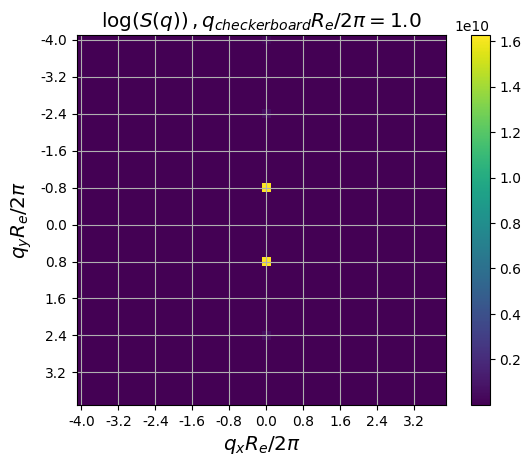

In [26]:
offset=1


plt.figure(dpi=100)
plt.grid()
def plot_structure_factor(lam):
    """plot Amplitude as a function of y
    """
    dir=f"lam{lam}/Nbar100"
    with h5py.File(f'{dir}/coord.h5', 'r') as f:
        ##number of beads per polymer
        N=int(f['parameter/reference_Nbeads'][()]) 
        ##number of polymers
        n_polym=int(f['parameter/n_polymers'][()]) 
        ##box dimensions 
        lxyz=np.array(f['parameter/lxyz'])
        ##box discretization
        nxyz=np.array(f['parameter/nxyz'])
        #discretization
        dxyz=lxyz/nxyz
        #adjust lengths and discretizations
        lxyz=lxyz-2*offset*dxyz
        nxyz=nxyz-2*offset
        #umbrella field
        umb_field=np.array(f["umbrella_field"])
        #area51
        area51=np.array(f["area51"])
        with h5py.File(f'{dir}/coord_ana.h5', 'r') as f:
            #only load every other frame, the others are not optimized
            phi=np.array(f['density_field'])
    print(phi.shape)
    V=np.prod(lxyz)
    rho0=N*n_polym/np.prod(lxyz)
    #only every other frame is optimized
    phi_hom=phi[::2]
    phi_opt=phi[1::2]
    #average phi over time
    phi_hom=phi_hom.mean(axis=0)
    phi_opt=phi_opt.mean(axis=0)
    #number of accessible cells 
    n_cells=int(len(area51[area51==0]))
    #field scaling type
    scale=n_cells/(N*n_polym)
    #reshape density and umbrella field
    phi_opt=phi_opt*scale
    phi_hom=phi_hom*scale
    phi_opt=phi_opt[:,area51==0].reshape(phi_opt.shape[0],nxyz[0],nxyz[1],nxyz[2])
    phi_hom=phi_hom[:,area51==0].reshape(phi_hom.shape[0],nxyz[0],nxyz[1],nxyz[2])
    phi_tot_hom=np.sum(phi_hom,axis=0)
    phi_tot_opt=np.sum(phi_opt,axis=0)
    #phi_tot[phi_tot==0]=1
    umb_field=umb_field[umb_field>-1].reshape(2,nxyz[0],nxyz[2])
    composition_hom=deepcopy(phi_hom)
    composition_opt=deepcopy(phi_opt)
    for j in range(2):
        composition_hom[j]/=phi_tot_hom
        composition_opt[j]/=phi_tot_opt
    #get phi and composition at y value where umbrella field is defined averaged over z
    composition_mean_hom=composition_hom[:,:,0,:]
    composition_mean_opt=composition_opt[:,:,0,:]
    delta_comp_hom=composition_mean_hom[0]-composition_mean_hom[1]
    delta_comp_opt=composition_mean_opt[0]-composition_mean_opt[1]
    print(delta_comp_hom.shape)
    fourier = np.fft.fftshift(np.fft.fft2(delta_comp_opt))
    S=N**2*rho0/(4*V)*np.abs(fourier)**2

    magnitude_spectrum =S#np.log10(S)
    #magnitude_spectrum=S
    # Get the image dimensions
    height, width = magnitude_spectrum.shape

    # Set the frequency values for x and y axes
    freq_x = np.fft.fftshift(np.fft.fftfreq(width))*8
    freq_y = np.fft.fftshift(np.fft.fftfreq(height))*8

    # Plot the magnitude spectrum
    plt.imshow(magnitude_spectrum)
    plt.colorbar()
    plt.title(r'$\log(S( q))\,,$'+'$q_{checkerboard}R_e/2\pi=1.0$')
    plt.xlabel(r'$q_xR_e/2\pi$')
    plt.ylabel(r'$q_yR_e/2\pi$')

    # Set the x and y tick labels
    plt.xticks(np.arange(0, width, 4), labels=np.round(freq_x[::4], decimals=2))
    plt.yticks(np.arange(0, height, 4), labels=np.round(freq_y[::4], decimals=2))
    plt.show()
    return 

plot_structure_factor(5)






/var/folders/f5/zmpl7j_93n5bz1wd70hgb4140000gn/T/ipykernel_3670/437626812.py:4: RuntimeWarning: invalid value encountered in divide
  return (2*x**2/(N*(x+np.exp(-x)-1))-2*chi)**(-1)


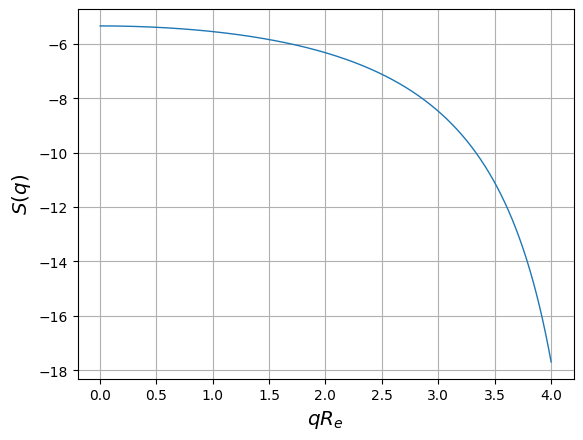

In [27]:
N=32
def scoll(q,N,chi):
    x=1/6*q**2
    return (2*x**2/(N*(x+np.exp(-x)-1))-2*chi)**(-1)

q=np.linspace(0,4,1000)

plt.figure(dpi=100)
plt.grid()
plt.xlabel("$qR_e$")
plt.ylabel("$S(q)$")
plt.plot(q,scoll(q,N,5/N),lw=1)
plt.savefig("S-q.pdf")